In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [86]:
filename = r"Euler_algo_0.100000.csv"

def analysis(filename):
    df = pd.read_csv(filename)

    def energy(x,v):
        return 0.5*v*v+0.5*x*x

    step = float(filename[-12:-4])
    
    df['t'] = step*df.index
    df["sin(t)"] = np.sin(step*df.index)
    df["E"] = energy(df['x'],df['v'])
    
    return df

df1 = analysis(r"Euler_algo_0.100000.csv")
df2 = analysis(r"Euler_algo_0.010000.csv")

df3 = analysis(r"VV_algo_0.100000.csv")
df4 = analysis(r"VV_algo_0.010000.csv")

In [68]:
df3

,x,v,t,sin(t),E
0,0.000000,1.000000,0.0,0.000000,0.500000
1,0.100000,0.995000,0.1,0.099833,0.500012
2,0.199000,0.980050,0.2,0.198669,0.500050
3,0.296010,0.955299,0.3,0.295520,0.500109
4,0.390060,0.920996,0.4,0.389418,0.500190
...,...,...,...,...,...
99995,0.745672,0.667356,9999.5,0.188286,0.500695
99996,0.808679,0.589638,9999.6,0.089297,0.500817
99997,0.863599,0.506024,9999.7,-0.010583,0.500932
99998,0.909884,0.417350,9999.8,-0.110358,0.501035


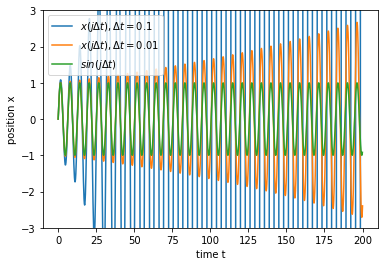

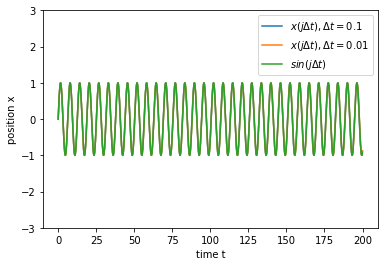

In [69]:
def plot_x_t_diagram(df1, df2, time, name):

    df1_ = df1.head(time*10)
    df2_ = df2.head(time*100)

    fig, ax = plt.subplots()
    ax.plot(df1_['t'], df1_['x'], label = "$x(j \Delta t), \Delta t = 0.1$") 
    ax.plot(df2_['t'], df2_['x'], label = "$x(j \Delta t), \Delta t = 0.01$") 
    ax.plot(df1_['t'], df1_["sin(t)"], label = "$sin(j \Delta t)$")
    ax.set_xlabel('time t')
    ax.set_ylim(-3.0,3.0)
    ax.set_ylabel('position x')
    #ax.set_title("Euler algorithm")
    ax.legend()
    fig.savefig(name, dpi = 300)
    
plot_x_t_diagram(df1, df2, 200, r"./x_t_Euler.png")
plot_x_t_diagram(df3, df4, 200, r"./x_t_VV.png")

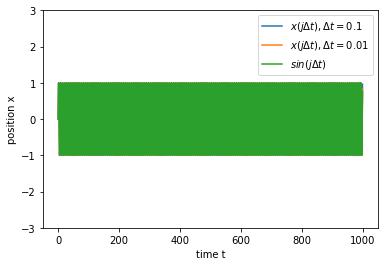

In [60]:
plot_x_t_diagram(df3, df4, 1000, r"./x_t_VV.png")

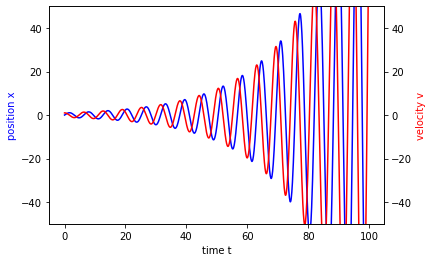

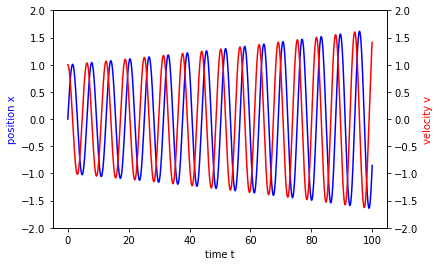

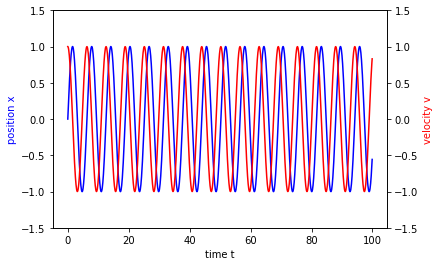

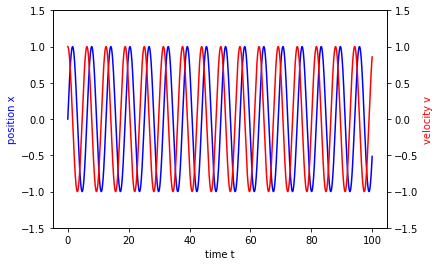

In [84]:
def plot_x_v_digram(df1,time,lim,name):
    df1_ = df1.head(time*10)

    fig, ax1 = plt.subplots()
    ax1.plot(df1_['t'], df1_['x'], label = "$x(j \Delta t), \Delta t = 0.1$",color='b') 
    ax1.set_ylabel('position x',color='b')
    ax1.set_ylim(-lim,lim)
    ax1.set_xlabel('time t')

    
    ax2 = ax1.twinx()
    ax2.plot(df1_['t'], df1_['v'], label = "$v(j \Delta t), \Delta t = 0.1$",color='r') 
    ax2.set_ylabel('velocity v', color='r')
    ax2.set_ylim(-lim,lim)



    fig.savefig(name, dpi = 300)
    
plot_x_v_digram(df1,100,50.0,r"./x_v_Euler01.png")
plot_x_v_digram(df2,1000,2.0,r"./x_v_Euler001.png")
plot_x_v_digram(df3,100,1.5,r"./x_v_VV01.png")
plot_x_v_digram(df4,1000,1.5,r"./x_v_VV001.png")

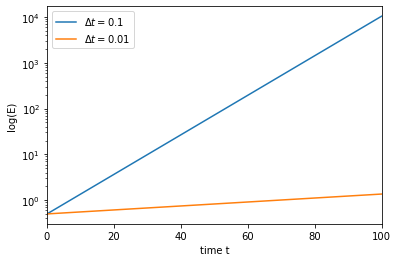

In [105]:
def plot_Euler_E_diagram(df1, df2):
    df1_ = df1.head(1000)
    df2_ = df2.head(10000)
    
    fig, ax = plt.subplots()
    ax.plot(df1_['t'], df1_['E'], label = "$\Delta t = 0.1$") 
    ax.plot(df2_['t'], df2_['E'], label = "$\Delta t = 0.01$") 
    ax.set_ylabel("log(E)")
    ax.set_yscale("log")
    #ax.set_xscale("log")
    ax.set_xlabel('time t')
    ax.set_xlim(0,100)
    ax.legend()
    
    fig.savefig(r"./Euler_E.png", dpi=300)
    
plot_Euler_E_diagram(df1, df2)

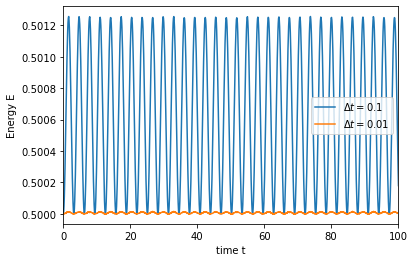

In [106]:
def plot_VV_E_diagram(df3, df4):
    fig, ax = plt.subplots()
    #ax.plot(df1['t'], df1['E'], label = "$Euler E(j \Delta t), \Delta t = 0.1$") 
    #ax.plot(df2['t'], df2['E'], label = "$Euler E(j \Delta t), \Delta t = 0.01$") 
    ax.plot(df3['t'], df3['E'], label = "$\Delta t = 0.1$") 
    ax.plot(df4['t'], df4['E'], label = "$\Delta t = 0.01$") 
    ax.set_ylabel("Energy E")
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    ax.set_xlabel('time t')
    ax.set_xlim(0,100)
    ax.legend()
    
    fig.savefig(r"./VV_E.png", dpi=300)

plot_VV_E_diagram(df3, df4)